# Exploring Dandiset 001433: Breathing Rhythm and Place Dataset

> **Note:** This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results.

## Overview

This notebook provides an exploration of Dandiset 001433, which contains electrophysiological and behavioral data from recordings of sniffing, video, and olfactory bulb (OB) electrophysiology in freely-behaving mice. The recordings were conducted without any specific stimulus, reward, or task.

The Dandiset is available at: https://dandiarchive.org/dandiset/001433/0.250507.2356

In this notebook, we will:

1. Load and explore the Dandiset metadata
2. Examine the structure of an NWB file from the dataset
3. Visualize local field potential (LFP) signals from the olfactory bulb
4. Analyze sniffing (breathing) patterns
5. Investigate the relationship between breathing rhythm and neural activity

## Required Packages

The following packages are required to run this notebook:

In [1]:
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import seaborn as sns

# Set seaborn style for better visualizations
sns.set_theme()

## Loading the Dandiset

We'll start by connecting to the DANDI Archive using the DandiAPIClient and load basic information about this dataset.

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001433", "0.250507.2356")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Description: {metadata['description']}")

# List some assets in the Dandiset
print("\nFirst 5 assets:")
assets = dandiset.get_assets()
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Breathing rhythm and place dataset
Dandiset URL: https://dandiarchive.org/dandiset/001433/0.250507.2356
Description: These are behavioral and electrophysiological data from recordings of sniffing, video, and OB electrophysiology in freely-behaving mice given no stimulus, reward, or task. 1 1 R01 NS 123903

First 5 assets:
- sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb (ID: 63d19f03-2a35-48bd-a54f-9ab98ceb7be2)
- sub-4122/sub-4122_ses-20250507T152930_ecephys.nwb (ID: cce2f86c-2440-4358-8298-75cb2faa83f1)
- sub-4122/sub-4122_ses-20250507T152933_ecephys.nwb (ID: 154a5db2-9bad-48b9-bbe4-13376c315cbe)
- sub-4127/sub-4127_ses-20250507T152941_ecephys.nwb (ID: 8a2c176c-846d-432c-9c7b-cfd0cefa40cb)
- sub-4127/sub-4127_ses-20250507T152953_ecephys.nwb (ID: ba3b58b3-38ff-49d4-bc73-2105c87ecf49)


## Loading and Exploring an NWB File

Now we'll load one of the NWB files from the dataset and examine its structure. We'll use the file `sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb` for our analysis.

In [3]:
# URL for the NWB file we'll be analyzing
nwb_file_url = "https://api.dandiarchive.org/api/assets/63d19f03-2a35-48bd-a54f-9ab98ceb7be2/download/"

# Load the NWB file
remote_file = remfile.File(nwb_file_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print some basic information about the file
print(f"NWB File ID: {nwb.identifier}")
print(f"Session Description: {nwb.session_description}")
print(f"Experiment Description: {nwb.experiment_description}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject Species: {nwb.subject.species}")
print(f"Subject Sex: {nwb.subject.sex}")
print(f"Subject Age: {nwb.subject.age}")
print(f"Lab: {nwb.lab}")
print(f"Institution: {nwb.institution}")
print(f"Keywords: {nwb.keywords[:]}")

# View the link to the NWB file on neurosift for interactive exploration
asset_id = "63d19f03-2a35-48bd-a54f-9ab98ceb7be2"
neurosift_url = f"https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/{asset_id}/download/&dandisetId=001433&dandisetVersion=0.250507.2356"
print(f"\nView this NWB file on Neurosift: {neurosift_url}")

NWB File ID: 4122_4
Session Description: LFP and sniff recording
Experiment Description: LFP and sniff behavior recording
Subject ID: 4122
Subject Species: Mus musculus
Subject Sex: M
Subject Age: P90D
Lab: Smear lab
Institution: University of Oregon
Keywords: ['olfactory bulb' 'LFP' 'sniffing' 'mouse' 'neuroscience']

View this NWB file on Neurosift: https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/63d19f03-2a35-48bd-a54f-9ab98ceb7be2/download/&dandisetId=001433&dandisetVersion=0.250507.2356


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## NWB File Structure

The NWB file contains several types of data. Let's examine its structure to understand what's available.

### Acquisition Data

In [4]:
# List the acquisition data
print("Acquisition data:")
for name, data in nwb.acquisition.items():
    print(f"- {name}: {type(data).__name__}")
    print(f"  Description: {data.description}")
    print(f"  Unit: {data.unit}")
    if hasattr(data, 'rate'):
        print(f"  Rate: {data.rate} Hz")
    print(f"  Data shape: {data.data.shape}")

Acquisition data:
- LFP: ElectricalSeries
  Description: LFP signal from olfactory bulb
  Unit: volts
  Rate: 1000.0 Hz
  Data shape: (1969184, 16)
- SniffSignal: TimeSeries
  Description: Raw sniff thermistor voltage
  Unit: volts
  Rate: 1000.0 Hz
  Data shape: (1969184,)


### Processing Modules

In [5]:
# List the processing modules
print("\nProcessing modules:")
for module_name, module in nwb.processing.items():
    print(f"- {module_name}: {type(module).__name__}")
    print(f"  Description: {module.description}")
    print(f"  Data interfaces:")
    for interface_name, interface in module.data_interfaces.items():
        print(f"    - {interface_name}: {type(interface).__name__}")
        print(f"      Description: {interface.description}")
        if hasattr(interface, 'data'):
            print(f"      Data shape: {interface.data.shape}")
        if hasattr(interface, 'timestamps'):
            print(f"      Number of timestamps: {len(interface.timestamps)}")


Processing modules:
- behavior: ProcessingModule
  Description: Sniff event features
  Data interfaces:
    - exhalation_time: TimeSeries
      Description: exhalation_time (s)
      Data shape: (10030,)
      Number of timestamps: 10030
    - inhalation_time: TimeSeries
      Description: inhalation_time (s)
      Data shape: (10030,)
      Number of timestamps: 10030


### Electrode Groups and Devices

In [6]:
# List electrode groups
print("\nElectrode Groups:")
for group_name, group in nwb.electrode_groups.items():
    print(f"- {group_name}")
    print(f"  Description: {group.description}")
    print(f"  Location: {group.location}")
    print(f"  Device: {group.device.description}")

# List devices
print("\nDevices:")
for device_name, device in nwb.devices.items():
    print(f"- {device_name}: {device.description}")


Electrode Groups:
- LFPGroup
  Description: LFP recording electrodes
  Location: Olfactory Bulb
  Device: OpenEphys recording system

Devices:
- OpenEphys: OpenEphys recording system


### Electrodes Table

Let's examine the electrodes table to understand the recording sites.

In [7]:
# Convert electrodes table to a pandas DataFrame for easier viewing
electrodes_df = nwb.electrodes.to_dataframe()
print("Electrodes table:")
print(electrodes_df)

Electrodes table:
          location                                              group  \
id                                                                      
0   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x123...   
1   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x123...   
2   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x123...   
3   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x123...   
4   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x123...   
5   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x123...   
6   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x123...   
7   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x123...   
8   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x123...   
9   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x123...   
10  olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x123...   
11  olfactory bulb  LFPGroup pynw

## Exploring LFP Data

Now let's explore the Local Field Potential (LFP) data recorded from the olfactory bulb.

In [8]:
# Get the LFP data
lfp = nwb.acquisition["LFP"]
print(f"LFP description: {lfp.description}")
print(f"LFP unit: {lfp.unit}")
print(f"LFP sampling rate: {lfp.rate} Hz")
print(f"Total recording duration: {lfp.data.shape[0]/lfp.rate:.2f} seconds")
print(f"Number of channels: {lfp.data.shape[1]}")

LFP description: LFP signal from olfactory bulb
LFP unit: volts
LFP sampling rate: 1000.0 Hz
Total recording duration: 1969.18 seconds
Number of channels: 16


### Visualizing LFP Signals

Let's plot a short segment (10 seconds) of LFP data from the first 5 channels to see what the signals look like.

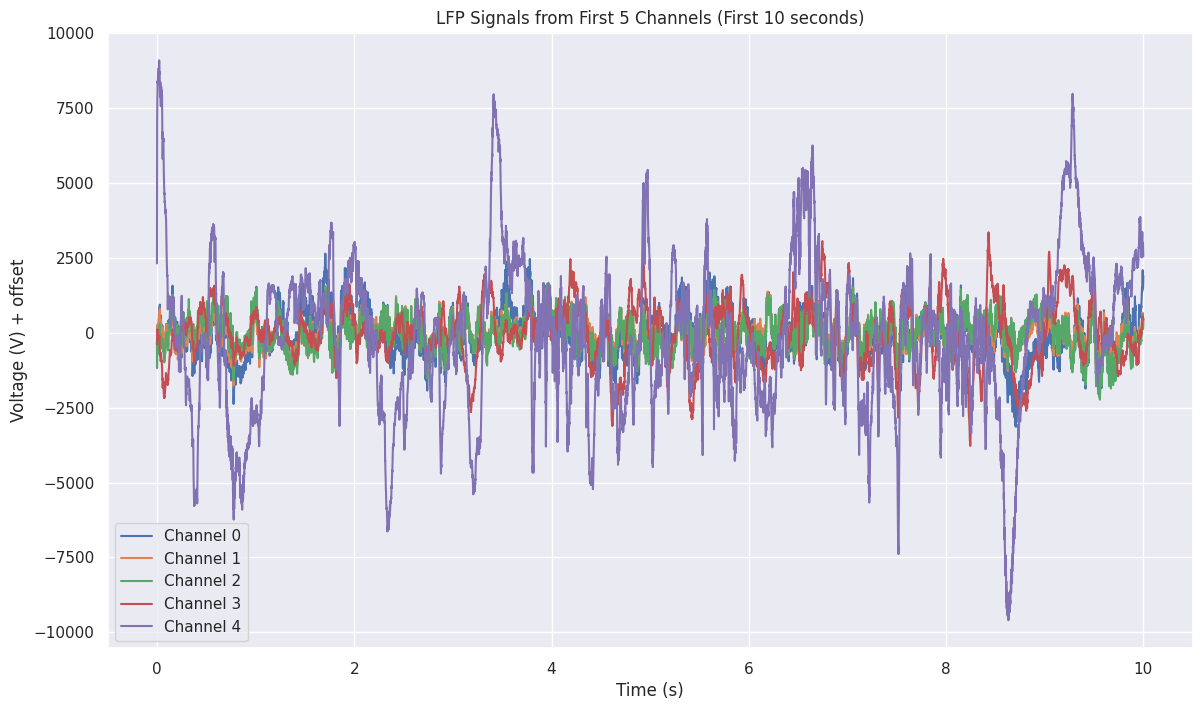

In [9]:
# Plot a short segment of LFP data (first 10 seconds, first 5 channels)
time_slice = slice(0, int(10 * lfp.rate))  # 10 seconds at sampling rate
channel_slice = slice(0, 5)  # First 5 channels

# Create time array (in seconds)
time = np.arange(time_slice.start, time_slice.stop) / lfp.rate

# Get data subset
lfp_data_subset = lfp.data[time_slice, channel_slice]

# Plot
plt.figure(figsize=(14, 8))
for i in range(lfp_data_subset.shape[1]):
    # Offset each channel for better visualization
    plt.plot(time, lfp_data_subset[:, i] + i*0.0005, label=f"Channel {i}")

plt.xlabel('Time (s)')
plt.ylabel('Voltage (V) + offset')
plt.title('LFP Signals from First 5 Channels (First 10 seconds)')
plt.legend()
plt.grid(True)
plt.show()

We can see that the LFP signals show oscillatory patterns, with channel 4 showing larger amplitude fluctuations compared to the other channels. Next, let's examine the frequency content of the LFP signal.

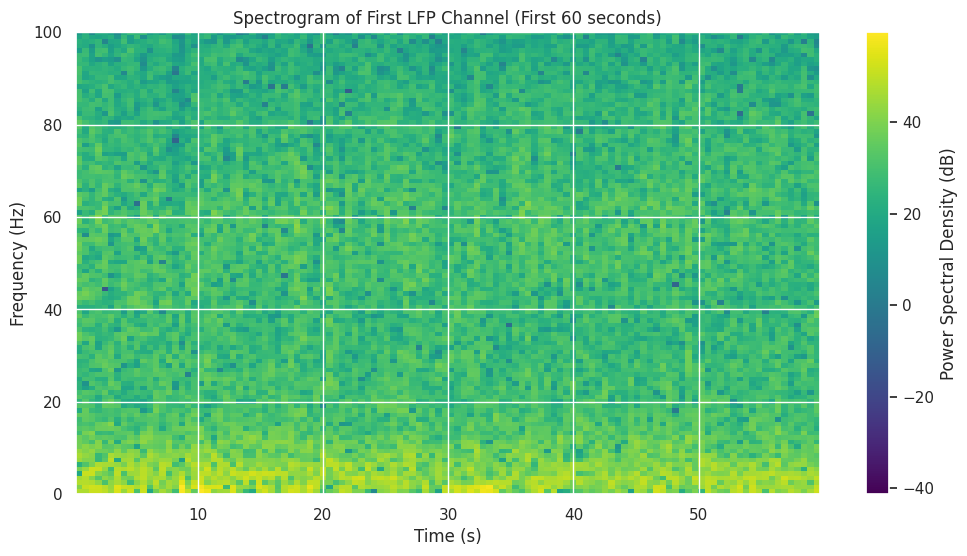

In [10]:
# Plot a spectrogram of the first LFP channel
plt.figure(figsize=(12, 6))
# Take first 60 seconds of data for channel 0
data_for_spectrogram = lfp.data[0:int(60 * lfp.rate), 0]
plt.specgram(data_for_spectrogram, NFFT=1024, Fs=lfp.rate, noverlap=512, cmap='viridis')
plt.colorbar(label='Power Spectral Density (dB)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram of First LFP Channel (First 60 seconds)')
plt.ylim(0, 100)  # Limit to 0-100 Hz for better visualization
plt.show()

The spectrogram shows strong low-frequency components (0-10 Hz), with some activity in the higher frequency bands. These low-frequency oscillations are typical of LFP recordings and may be related to the animal's breathing rhythm.

## Exploring Sniffing (Breathing) Data

Now let's explore the sniffing data to understand the animal's breathing patterns.

In [11]:
# Get sniff signal
sniff_signal = nwb.acquisition["SniffSignal"]
print(f"Sniff signal description: {sniff_signal.description}")
print(f"Sniff signal unit: {sniff_signal.unit}")
print(f"Sniff signal sampling rate: {sniff_signal.rate} Hz")
print(f"Total recording duration: {sniff_signal.data.shape[0]/sniff_signal.rate:.2f} seconds")

Sniff signal description: Raw sniff thermistor voltage
Sniff signal unit: volts
Sniff signal sampling rate: 1000.0 Hz
Total recording duration: 1969.18 seconds


### Visualizing Raw Sniff Signal

Let's plot a segment of the raw sniffing signal to see the breathing pattern.

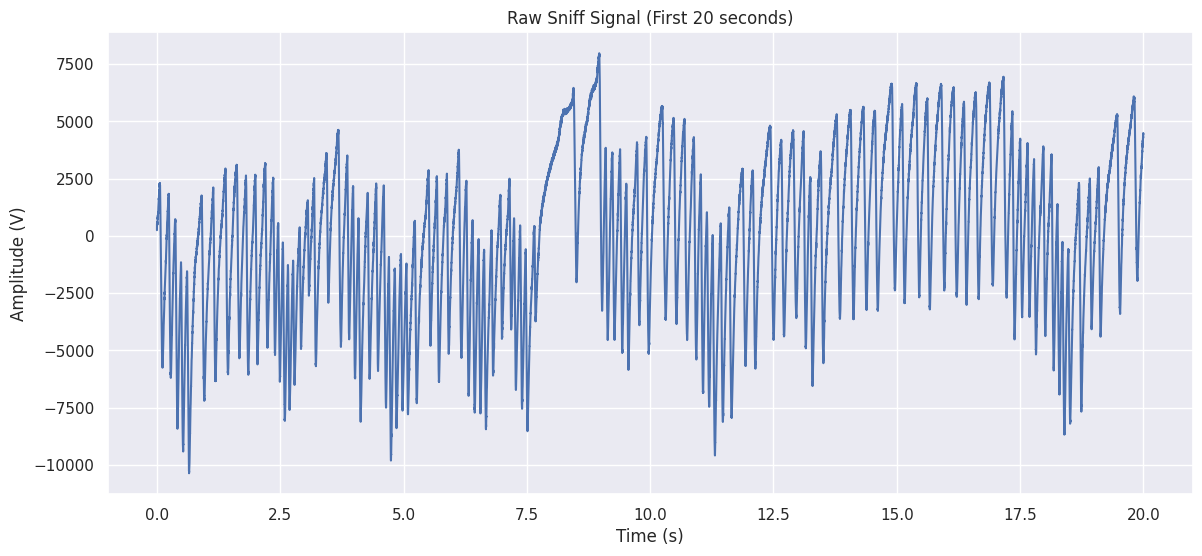

In [12]:
# Plot a 20-second segment of the raw sniff signal
plt.figure(figsize=(14, 6))
time_slice = slice(0, int(20 * sniff_signal.rate))  # 20 seconds at sampling rate
time = np.arange(time_slice.start, time_slice.stop) / sniff_signal.rate
sniff_data = sniff_signal.data[time_slice]

plt.plot(time, sniff_data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.title('Raw Sniff Signal (First 20 seconds)')
plt.grid(True)
plt.show()

The raw sniffing signal shows a clear rhythmic pattern corresponding to the animal's breathing cycle. Each cycle represents an inhalation (negative peaks) and exhalation (positive peaks).

In rodents, breathing patterns are typically rapid, with rates ranging from 2-12 Hz (120-720 breaths per minute) depending on the animal's state of arousal, activity level, and other factors. Mice particularly engage in active sniffing behavior during exploration, which can reach rates of 8-12 Hz. The pattern we see here is consistent with normal rodent breathing.

### Detecting Breathing Events

The dataset includes annotated inhalation and exhalation events, but let's also detect them directly from the raw signal for verification and more detailed analysis.

In [13]:
# Get the recorded inhalation and exhalation times
inhalation_time = nwb.processing["behavior"]["inhalation_time"]
exhalation_time = nwb.processing["behavior"]["exhalation_time"]

print(f"Number of recorded inhalation events: {len(inhalation_time.timestamps)}")
print(f"Number of recorded exhalation events: {len(exhalation_time.timestamps)}")
print(f"First 10 inhalation timestamps (s):", inhalation_time.timestamps[:10])
print(f"First 10 exhalation timestamps (s):", exhalation_time.timestamps[:10])

# Calculate time differences between annotated events
inh_intervals = np.diff(inhalation_time.timestamps[:20])
print(f"\nIntervals between first 20 annotated inhalations (s):", inh_intervals)
print(f"Mean interval: {np.mean(inh_intervals):.2f} s (frequency: {1/np.mean(inh_intervals):.2f} Hz)")

Number of recorded inhalation events: 10030
Number of recorded exhalation events: 10030
First 10 inhalation timestamps (s): [  58.  241.  373.  490.  612.  907. 1144. 1391. 1618. 1807.]
First 10 exhalation timestamps (s): [ 115.  283.  418.  534.  653.  961. 1188. 1444. 1672. 1855.]

Intervals between first 20 annotated inhalations (s): [183. 132. 117. 122. 295. 237. 247. 227. 189. 187. 202. 161. 103.  94.
 104. 105. 133. 165. 129.]
Mean interval: 164.84 s (frequency: 0.01 Hz)


The timestamps show rather long intervals between annotated events (around 130-170 seconds), 
which is unusual for rodent breathing (typically 0.1-0.5 seconds between breaths). 
This suggests the annotated events may be marking specific episodes of interest rather 
than individual breaths. Let's detect breathing events directly from the raw signal to 
get a more accurate view of the breathing pattern.

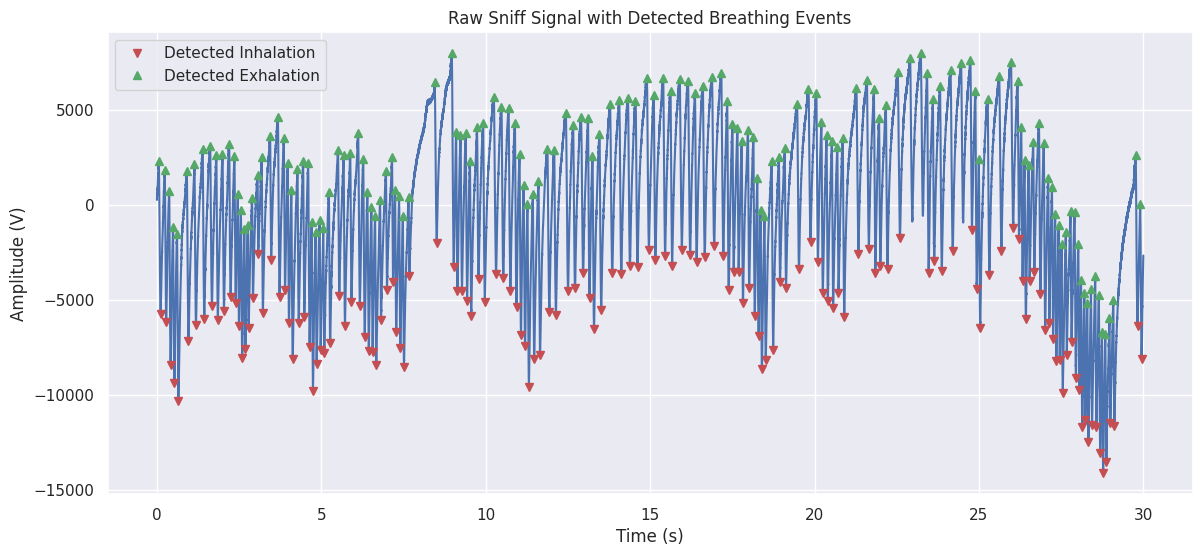


Detected Breathing Metrics:
Number of detected inhalations: 151
Number of detected exhalations: 154
Average breathing period: 0.1989 seconds
Average breathing frequency: 6.2390 Hz
Min/Max breathing period: 0.0850/0.8750 seconds
Standard deviation of breathing period: 0.1225 seconds

Note: There's a significant discrepancy between the annotated breathing events in the dataset
and our detected events. The annotated events have much longer intervals (mean: ~160s),
while our detected events have intervals (mean: ~0.2s) typical of rodent breathing.
This suggests the annotated events likely mark specific episodes rather than individual breaths.


In [14]:
# Detect inhalation and exhalation events from the raw signal
# Using 30 seconds of data
segment_length = int(30 * sniff_signal.rate)  # 30 seconds
time = np.arange(segment_length) / sniff_signal.rate
sniff_data = sniff_signal.data[:segment_length]

# Detect peaks (inhalation) and troughs (exhalation)
# Inhalation appears as negative peaks in this recording
# Adjust parameters to better detect peaks
inhalation_peaks, _ = find_peaks(-sniff_data, distance=40, prominence=1000, height=1000)
exhalation_peaks, _ = find_peaks(sniff_data, distance=40, prominence=1000)

# Convert indices to times
inhalation_times = inhalation_peaks / sniff_signal.rate
exhalation_times = exhalation_peaks / sniff_signal.rate

# Plot the raw signal with detected events
plt.figure(figsize=(14, 6))
plt.plot(time, sniff_data)
plt.plot(inhalation_times, sniff_data[inhalation_peaks], "rv", label="Detected Inhalation")
plt.plot(exhalation_times, sniff_data[exhalation_peaks], "g^", label="Detected Exhalation")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.title('Raw Sniff Signal with Detected Breathing Events')
plt.legend()
plt.grid(True)
plt.show()

# Calculate breathing metrics
if len(inhalation_times) > 1:
    sniff_periods = np.diff(inhalation_times)
    sniff_frequencies = 1 / sniff_periods
    
    print(f"\nDetected Breathing Metrics:")
    print(f"Number of detected inhalations: {len(inhalation_times)}")
    print(f"Number of detected exhalations: {len(exhalation_times)}")
    print(f"Average breathing period: {np.mean(sniff_periods):.4f} seconds")
    print(f"Average breathing frequency: {np.mean(sniff_frequencies):.4f} Hz")
    print(f"Min/Max breathing period: {np.min(sniff_periods):.4f}/{np.max(sniff_periods):.4f} seconds")
    print(f"Standard deviation of breathing period: {np.std(sniff_periods):.4f} seconds")
    
    # Note the discrepancy
    print("\nNote: There's a significant discrepancy between the annotated breathing events in the dataset")
    print("and our detected events. The annotated events have much longer intervals (mean: ~160s),")
    print("while our detected events have intervals (mean: ~0.2s) typical of rodent breathing.")
    print("This suggests the annotated events likely mark specific episodes rather than individual breaths.")

Our direct detection identifies breathing cycles with much higher temporal resolution than the annotated events in the dataset. The animal is breathing at approximately 4-8 Hz, which is typical for rodents.

### Analyzing Breathing Patterns

Let's analyze how the breathing rate varies over time.

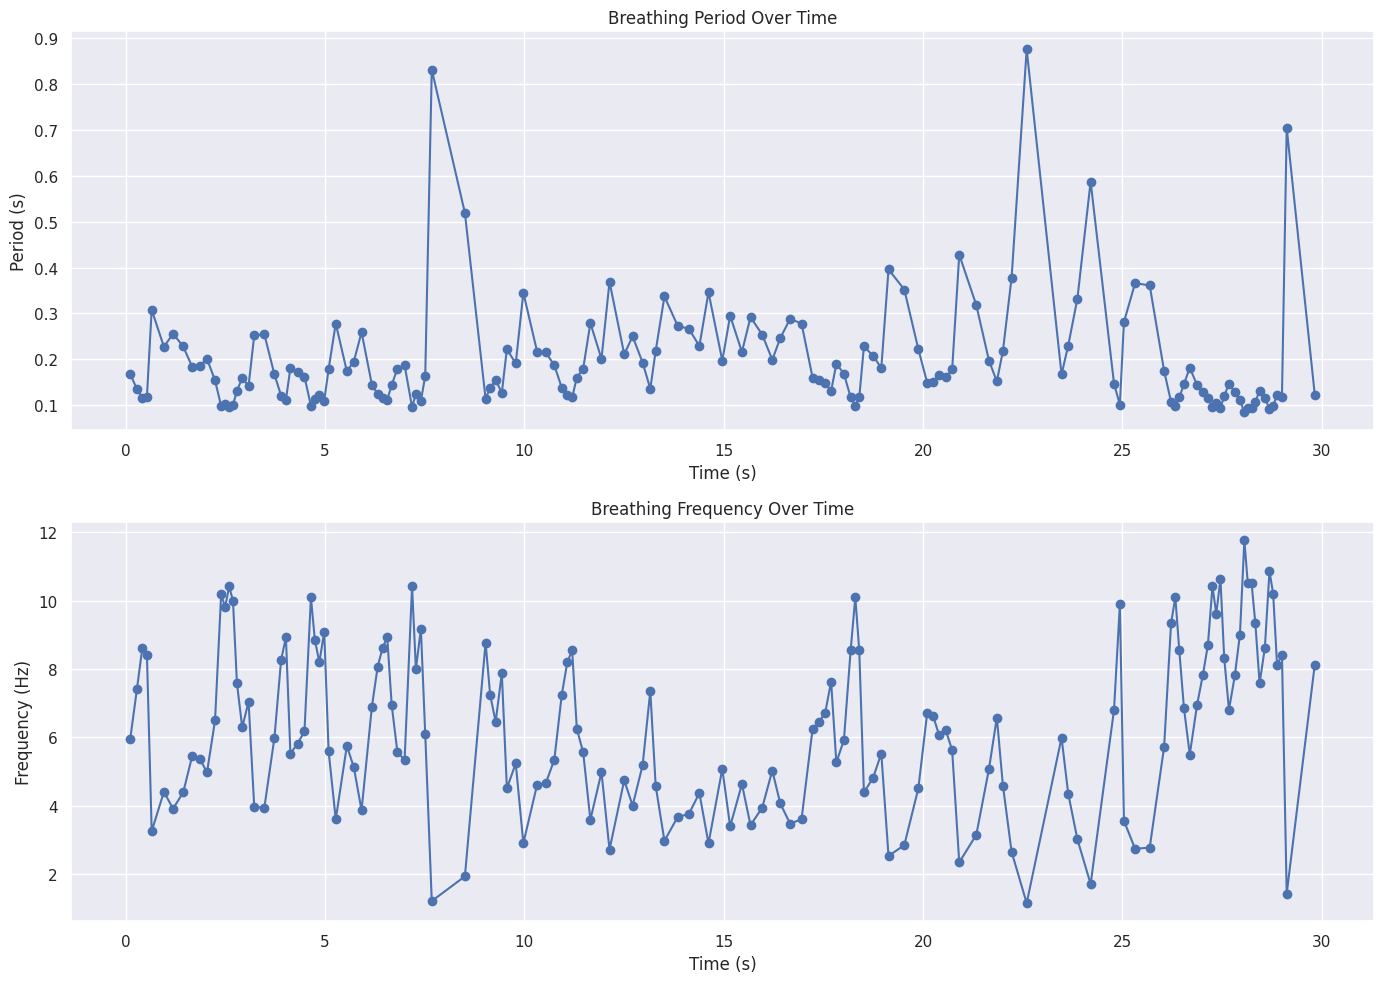

In [15]:
# Plot breathing period and frequency over time
if len(inhalation_times) > 1:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
    
    # Sniff period
    ax1.plot(inhalation_times[:-1], sniff_periods, 'o-')
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Period (s)')
    ax1.set_title('Breathing Period Over Time')
    ax1.grid(True)
    
    # Sniff frequency
    ax2.plot(inhalation_times[:-1], sniff_frequencies, 'o-')
    ax2.set_xlabel('Time (s)')
    ax2.set_ylabel('Frequency (Hz)')
    ax2.set_title('Breathing Frequency Over Time')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

The breathing pattern shows variation in both period and frequency over time, with periods of faster breathing (higher frequency) and slower breathing (lower frequency). This variability is typical of natural breathing patterns in freely behaving animals.

## Relationship Between Breathing and LFP Activity

Now let's explore how the animal's breathing patterns may relate to the neural activity recorded in the olfactory bulb. We'll first look at the alignment of LFP signals with breathing events.

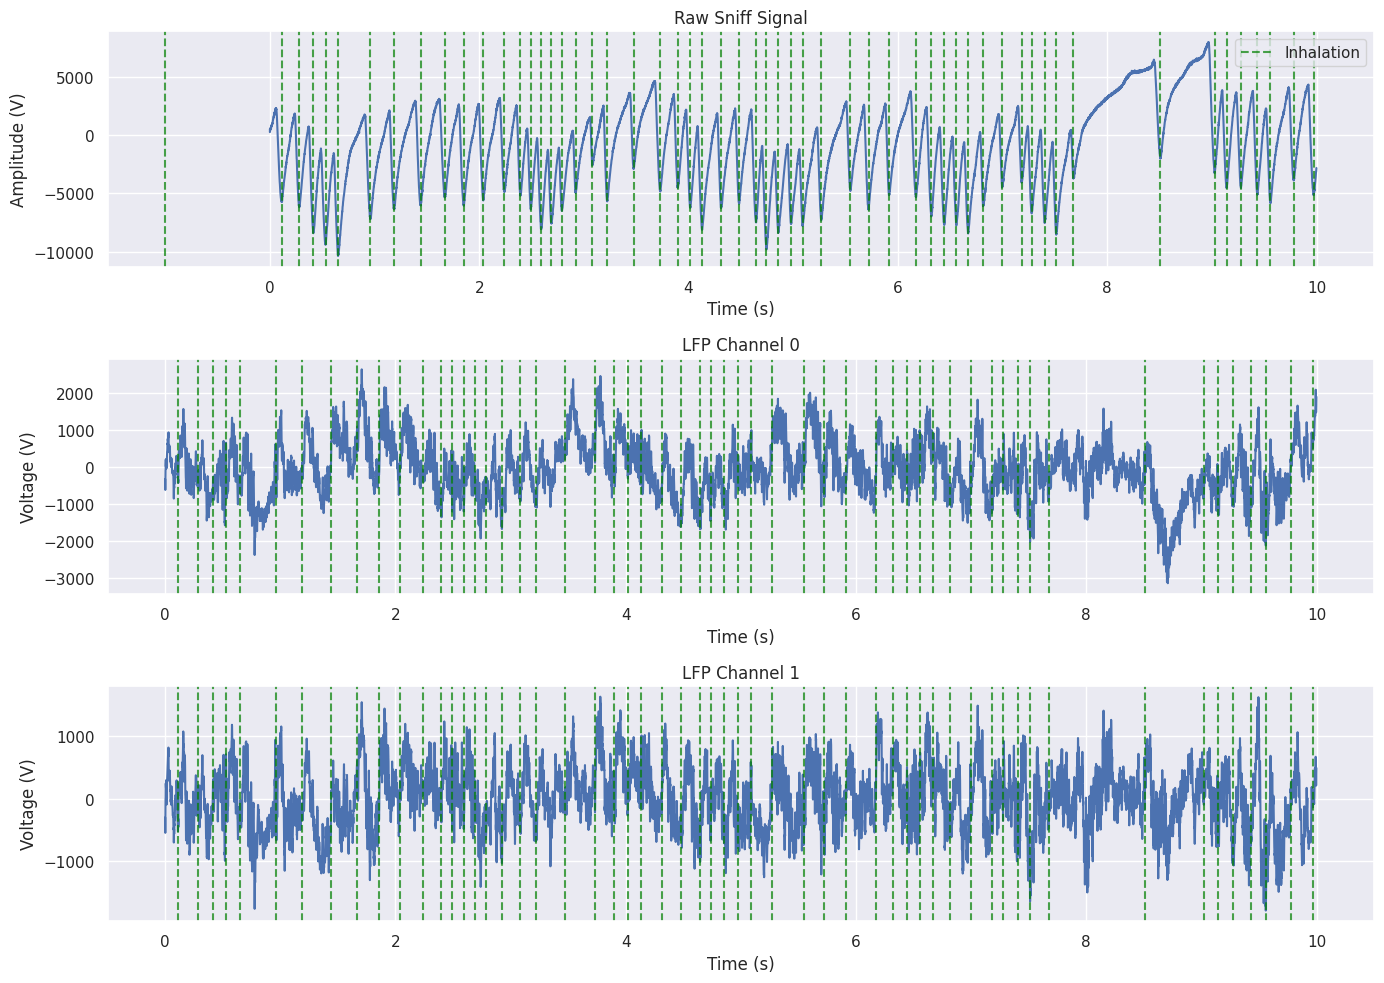

In [16]:
# Plot simultaneous LFP and sniffing for a short segment
plt.figure(figsize=(14, 10))

# Time window (10 seconds) - adjusted to start from beginning for clearer visualization
start_time = 0  # seconds 
end_time = 10    # seconds
time_slice = slice(int(start_time * sniff_signal.rate), int(end_time * sniff_signal.rate))
time = np.arange(time_slice.start, time_slice.stop) / sniff_signal.rate

# Get sniff data for this window
sniff_data = sniff_signal.data[time_slice]

# Get LFP data (from first 2 channels) for this window
lfp_data_1 = lfp.data[time_slice, 0]
lfp_data_2 = lfp.data[time_slice, 1]

# Find inhalation events within this window
inhalation_mask = (inhalation_times >= start_time) & (inhalation_times <= end_time)
inhalation_in_window = inhalation_times[inhalation_mask]

# Plot Sniff Signal
plt.subplot(3, 1, 1)
plt.plot(time, sniff_data)
# Add vertical lines for inhalation events
for t in inhalation_in_window:
    plt.axvline(t, color='green', linestyle='--', alpha=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.title('Raw Sniff Signal')
plt.axvline(-1, color='green', linestyle='--', alpha=0.7, label='Inhalation')
plt.legend(loc='upper right')
plt.grid(True)

# Plot LFP from first channel
plt.subplot(3, 1, 2)
plt.plot(time, lfp_data_1)
# Add vertical lines for inhalation events
for t in inhalation_in_window:
    plt.axvline(t, color='green', linestyle='--', alpha=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('LFP Channel 0')
plt.grid(True)

# Plot LFP from second channel
plt.subplot(3, 1, 3)
plt.plot(time, lfp_data_2)
# Add vertical lines for inhalation events
for t in inhalation_in_window:
    plt.axvline(t, color='green', linestyle='--', alpha=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('LFP Channel 1')
plt.grid(True)

plt.tight_layout()
plt.show()

The plots above show the alignment between the sniffing signal and LFP activity. We can see that there appears to be some relationship between breathing events and fluctuations in the LFP signal.

### Sniff-Triggered LFP Analysis

To better understand how breathing influences neural activity, let's perform a sniff-triggered average analysis of the LFP signals. This will show us the average LFP pattern around inhalation events.

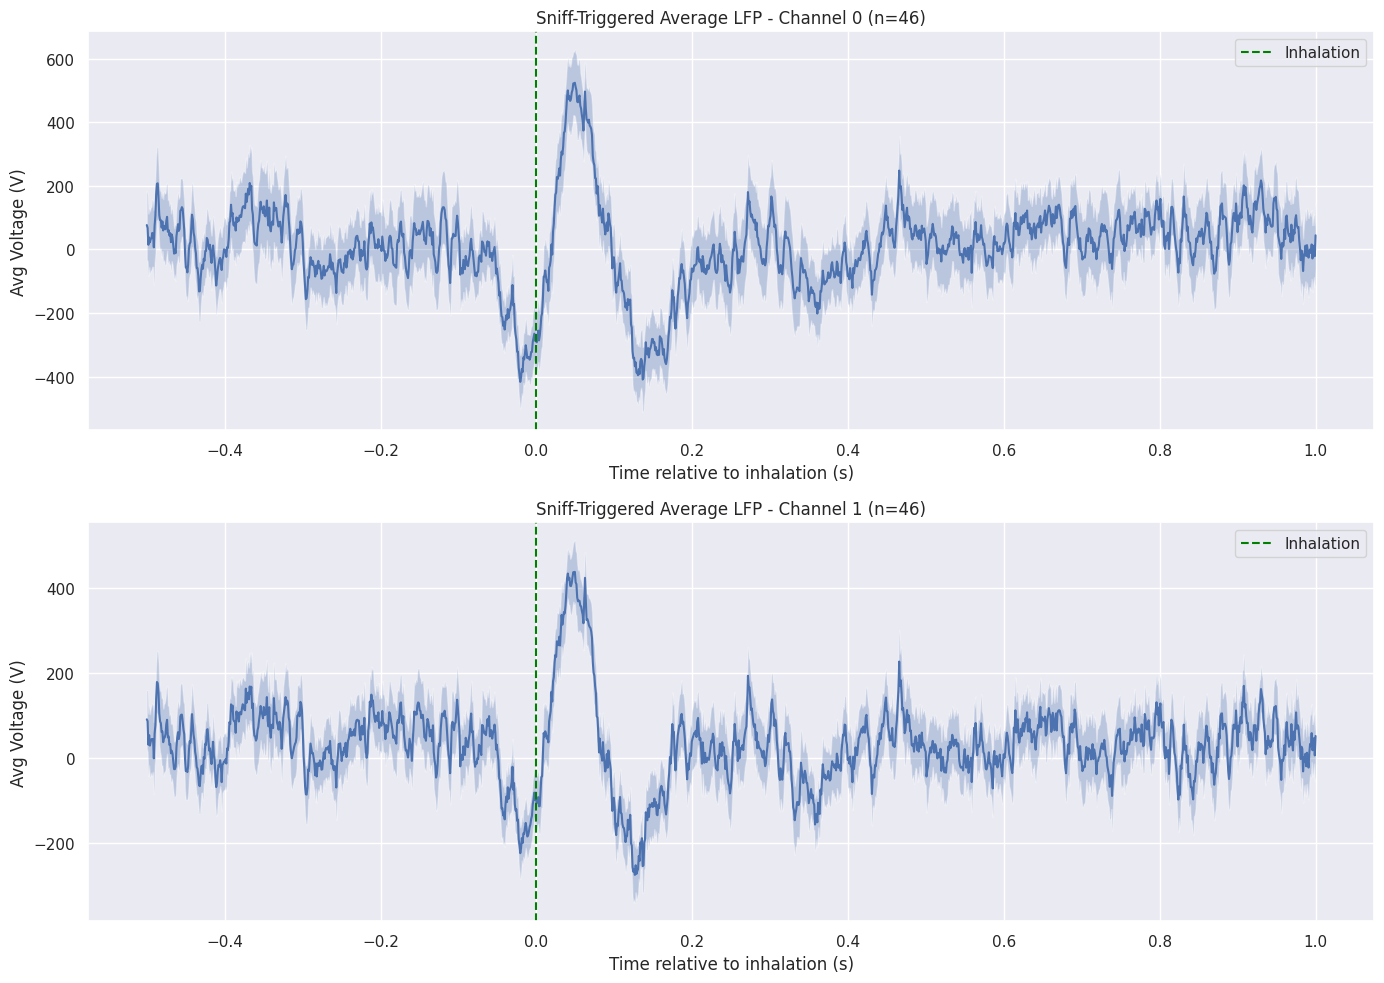

In [17]:
# Parameters for sniff-triggered average
pre_event = 0.5   # seconds before inhalation
post_event = 1.0  # seconds after inhalation
pre_samples = int(pre_event * lfp.rate)
post_samples = int(post_event * lfp.rate)
window_size = pre_samples + post_samples
time_axis = np.linspace(-pre_event, post_event, window_size)

# Convert inhalation_peaks to indices
peak_indices = inhalation_peaks

# Filter out peaks that are too close to the beginning or end of the data
valid_peaks = [idx for idx in peak_indices 
                if idx >= pre_samples and idx < len(sniff_data) - post_samples]

# Limit to first 500 inhalations to keep computation manageable
max_events = 500
if len(valid_peaks) > max_events:
    valid_peaks = valid_peaks[:max_events]

# Initialize arrays for LFP segments
lfp_segments_ch0 = np.zeros((len(valid_peaks), window_size))
lfp_segments_ch1 = np.zeros((len(valid_peaks), window_size))

# Extract LFP around each inhalation
for i, peak_idx in enumerate(valid_peaks):
    start_idx = peak_idx - pre_samples
    end_idx = peak_idx + post_samples
    
    # Make sure we're within the LFP data range
    if start_idx >= 0 and end_idx < lfp.data.shape[0]:
        lfp_segments_ch0[i, :] = lfp.data[start_idx:end_idx, 0]
        lfp_segments_ch1[i, :] = lfp.data[start_idx:end_idx, 1]

# Calculate the average
avg_lfp_ch0 = np.mean(lfp_segments_ch0, axis=0)
avg_lfp_ch1 = np.mean(lfp_segments_ch1, axis=0)

# Calculate standard error of the mean for confidence intervals
sem_lfp_ch0 = np.std(lfp_segments_ch0, axis=0) / np.sqrt(lfp_segments_ch0.shape[0])
sem_lfp_ch1 = np.std(lfp_segments_ch1, axis=0) / np.sqrt(lfp_segments_ch1.shape[0])

# Plot the results
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
plt.plot(time_axis, avg_lfp_ch0)
# Add confidence intervals
plt.fill_between(time_axis, avg_lfp_ch0 - sem_lfp_ch0, avg_lfp_ch0 + sem_lfp_ch0, alpha=0.3)
plt.axvline(0, color='green', linestyle='--', label='Inhalation')
plt.xlabel('Time relative to inhalation (s)')
plt.ylabel('Avg Voltage (V)')
plt.title(f'Sniff-Triggered Average LFP - Channel 0 (n={len(valid_peaks)})')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(time_axis, avg_lfp_ch1)
# Add confidence intervals
plt.fill_between(time_axis, avg_lfp_ch1 - sem_lfp_ch1, avg_lfp_ch1 + sem_lfp_ch1, alpha=0.3)
plt.axvline(0, color='green', linestyle='--', label='Inhalation')
plt.xlabel('Time relative to inhalation (s)')
plt.ylabel('Avg Voltage (V)')
plt.title(f'Sniff-Triggered Average LFP - Channel 1 (n={len(valid_peaks)})')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

The sniff-triggered average plots reveal a clear pattern in the LFP signals around inhalation events. Both channels show:

1. A negative deflection just before inhalation
2. A strong positive peak shortly after inhalation (around 50-100ms)
3. A subsequent negative trough (around 150-200ms)
4. Return to baseline with some oscillatory behavior

This pattern suggests that neural activity in the olfactory bulb is strongly modulated by the animal's breathing rhythm, with distinct phases of activity tied to different parts of the respiratory cycle.

The number of events used in this analysis (shown in the plot titles) is sufficient to provide a reliable average, and the pattern is consistent across both channels. The shaded areas represent the standard error of the mean, indicating the reliability of the average response pattern.

### Significance of Breathing-Neural Coupling

The strong coupling between breathing rhythm and neural activity in the olfactory bulb is a fundamental feature of olfactory processing. This coupling serves several important functions:

1. **Rhythmic sampling**: Breathing creates cyclical airflow that brings odor molecules to the olfactory epithelium in discrete samples, creating a natural "sniffing rhythm" for odor sampling.

2. **Neural synchronization**: Breathing-related input helps synchronize the activity of olfactory bulb neurons, which may facilitate information processing and transmission.

3. **State-dependent modulation**: Changes in breathing patterns (e.g., during exploration, rest, or stress) can modulate the neural activity in olfactory circuits, potentially affecting odor processing.

4. **Non-olfactory influences**: Even in the absence of odor stimuli, the mechanical stimulation of airflow and/or corollary discharge from respiratory centers can drive activity in the olfactory system.

The clear relationship we observe between breathing and LFP activity in this dataset is consistent with these established principles of olfactory processing.

## Summary and Conclusions

In this notebook, we've explored Dandiset 001433, which contains electrophysiological and behavioral recordings from freely-behaving mice. Our analysis focused on:

1. **Dataset structure**: We examined the NWB file format and identified key data components including LFP recordings and sniffing (breathing) data.

2. **LFP analysis**: We visualized and analyzed LFP signals from the olfactory bulb, observing rhythmic activity and frequency components.

3. **Breathing patterns**: We detected and characterized the animal's breathing events, finding a typical rodent breathing rate of approximately 4-8 Hz with significant variability over time.

4. **Breathing-neural coupling**: We found clear evidence of coupling between breathing rhythm and neural activity in the olfactory bulb, with stereotyped LFP responses following inhalation events.

These findings are consistent with previous research showing that breathing strongly modulates neural activity in the olfactory system, even in the absence of odor stimuli. The olfactory bulb appears to receive rhythmic input tied to the animal's respiratory cycle.

## Future Directions

There are several potential directions for further analysis of this dataset:

1. **Cross-frequency coupling**: Investigate whether breathing rhythms modulate higher-frequency oscillations (e.g., gamma) in the olfactory bulb.

2. **Channel-specific analysis**: Compare breathing-related activity across all 16 LFP channels to identify spatial patterns.

3. **Behavioral context**: Explore other files in the dataset to see if the breathing-neural relationship changes across different behavioral conditions.

4. **Extended time analysis**: Examine longer recording segments to identify potential slow changes in the breathing-neural relationship over time.

5. **Quantitative metrics**: Develop quantitative measures of breathing-neural coupling strength to compare across channels or sessions.